In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Modeling Inflation
df = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Datasets/Inflation_Data.csv')

# Convert Inflation rate to a number, with coercion to throw `NA` values if conversion not possible
df['inflation'] = pd.to_numeric(df.FPCPITOTLZGUSA, errors='coerce')

# Remove `NA` values
df.dropna(inplace=True)

In [7]:
df.head(3)

,DATE,FPCPITOTLZGUSA,inflation
0,1960-01-01,1.457976,1.457976
1,1961-01-01,1.070724,1.070724
2,1962-01-01,1.198773,1.198773


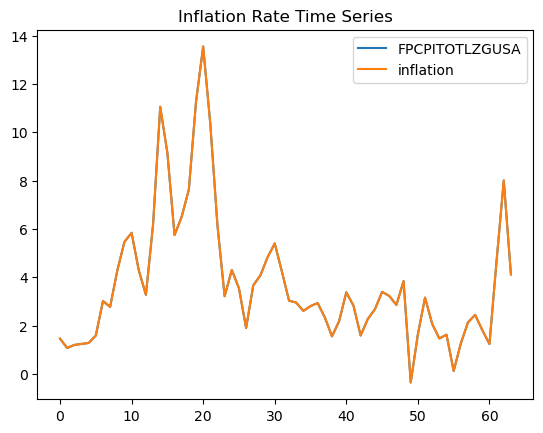

In [10]:
df.plot()
plt.title('Inflation Rate Time Series')
plt.show()

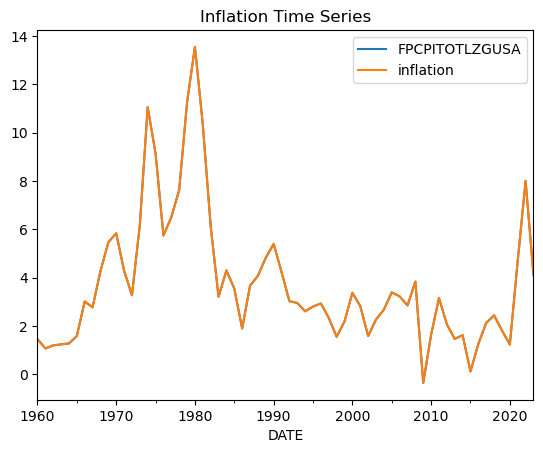

In [11]:
df.index = pd.to_datetime(df.DATE)
df.plot()
plt.title('Inflation Time Series')
plt.show()

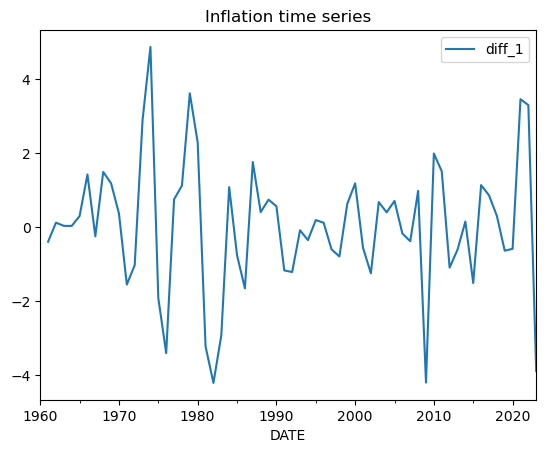

In [15]:
# Differencing to get a more or less stationary time series
df['diff_1'] = df.inflation - df.inflation.shift()
df.plot(y='diff_1')
plt.title('Inflation time series')
plt.show()

Text(0.5, 1.0, 'Inflation PACF')

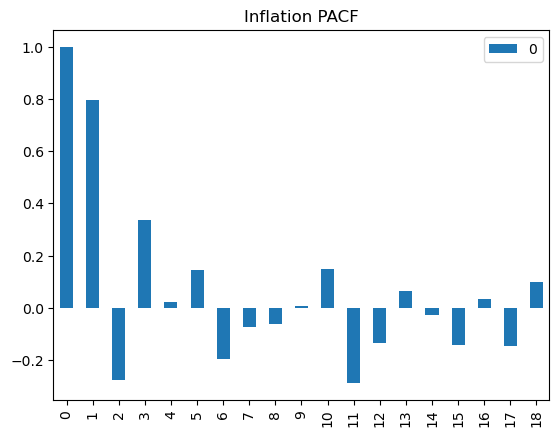

In [16]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(df.inflation))
x_acf.plot(kind='bar')
plt.title('Inflation PACF')

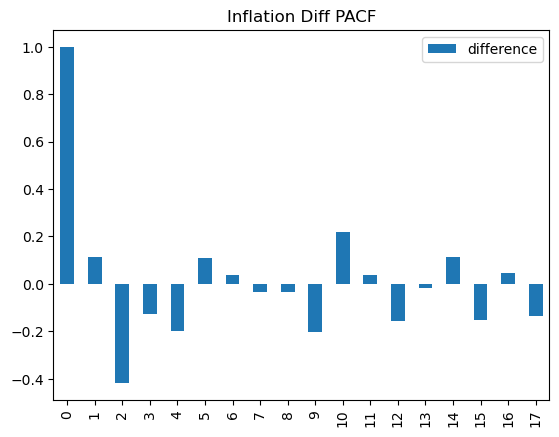

In [17]:
x_acf = pd.DataFrame(pacf(df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("Inflation Diff PACF")
plt.legend(['difference'])

In [ ]:
# We can conclude that the order of the AR process is 1.

In [ ]:
# Generating 5 ARIMA specifications and evaluating their efficacy in modeling the data:

                               SARIMAX Results                                
Dep. Variable:              inflation   No. Observations:                   64
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -125.935
Date:                Fri, 02 Aug 2024   AIC                            253.869
Time:                        20:49:17   BIC                            256.013
Sample:                    01-01-1960   HQIC                           254.712
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         3.1901      0.491      6.492      0.000       2.227       4.153
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):                 1.41
Prob(Q):                              0.37   Pr

C:\Anaconda\chowd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Anaconda\chowd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Anaconda\chowd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


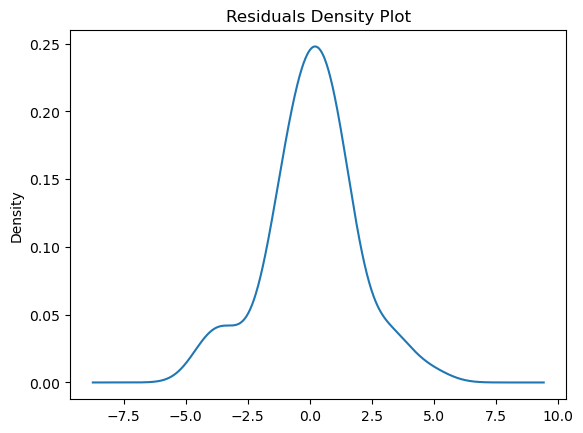

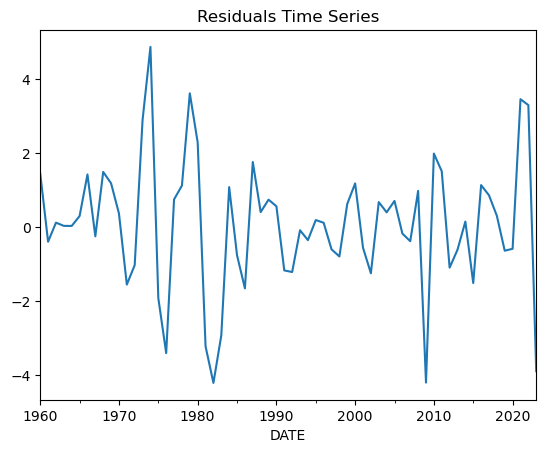

In [19]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming df is the DataFrame with an 'inflation' column
# Fit an ARIMA model to the inflation series
model = ARIMA(df.inflation, order=(0, 1, 0))
model_fit = model.fit()

# Print the summary of the fitted model
print(model_fit.summary())

# Print the residuals description
print('Residuals Description')
print(model_fit.resid.describe())

# Plot the residuals
model_fit.resid.plot(kind='kde')
plt.title('Residuals Density Plot')
plt.show()

# Plot the residuals over time
model_fit.resid.plot()
plt.title('Residuals Time Series')
plt.show()

                               SARIMAX Results                                
Dep. Variable:              inflation   No. Observations:                   64
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -124.537
Date:                Fri, 02 Aug 2024   AIC                            255.075
Time:                        20:58:58   BIC                            261.552
Sample:                    01-01-1960   HQIC                           257.626
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6710      1.173      3.129      0.002       1.372       5.970
ar.L1          0.7825      0.073     10.750      0.000       0.640       0.925
sigma2         2.8267      0.419      6.754      0.0

C:\Anaconda\chowd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Anaconda\chowd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Anaconda\chowd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


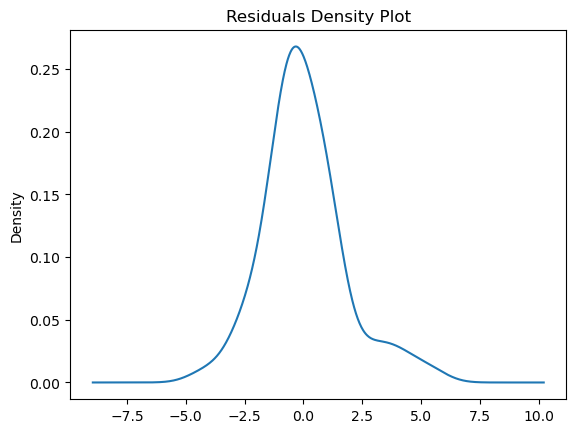

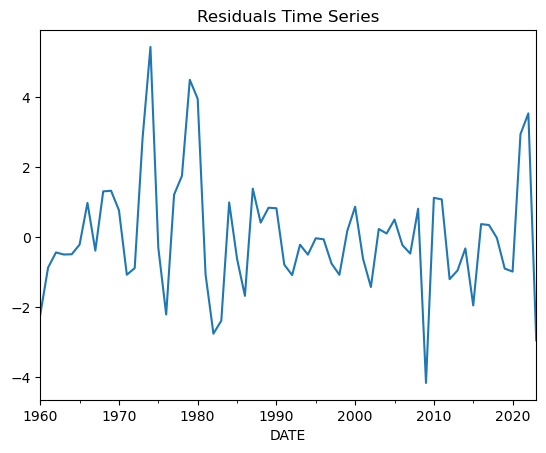

In [21]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming df is the DataFrame with an 'inflation' column
# Fit an ARIMA model to the inflation series
model = ARIMA(df.inflation, order=(1, 0, 0))
model_fit = model.fit()

# Print the summary of the fitted model
print(model_fit.summary())

# Print the residuals description
print('Residuals Description')
print(model_fit.resid.describe())

# Plot the residuals
model_fit.resid.plot(kind='kde')
plt.title('Residuals Density Plot')
plt.show()

# Plot the residuals over time
model_fit.resid.plot()
plt.title('Residuals Time Series')
plt.show()

C:\Anaconda\chowd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Anaconda\chowd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Anaconda\chowd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              inflation   No. Observations:                   64
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -119.752
Date:                Fri, 02 Aug 2024   AIC                            247.504
Time:                        21:01:05   BIC                            256.140
Sample:                    01-01-1960   HQIC                           250.906
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6561      0.814      4.494      0.000       2.061       5.251
ar.L1          0.5872      0.126      4.677      0.000       0.341       0.833
ma.L1          0.5749      0.156      3.685      0.0

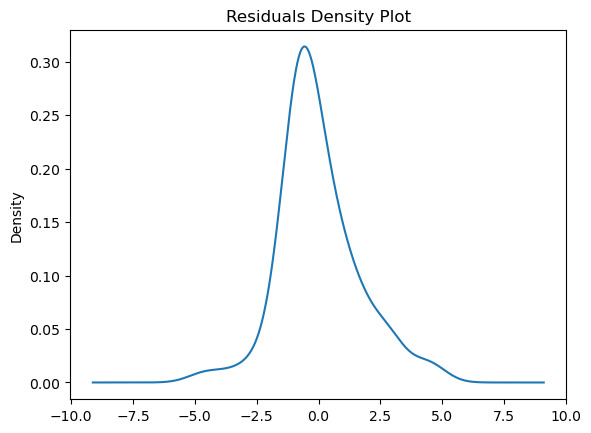

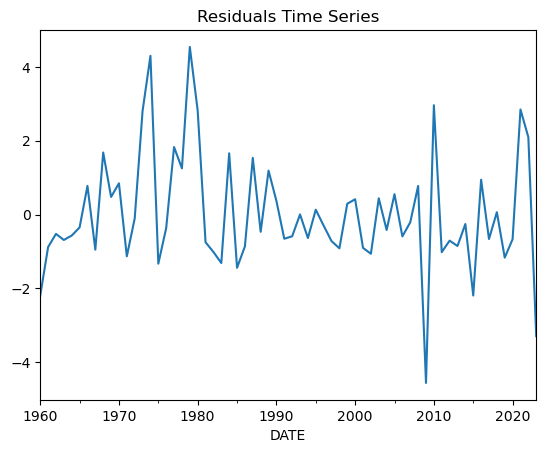

In [22]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming df is the DataFrame with an 'inflation' column
# Fit an ARIMA model to the inflation series
model = ARIMA(df.inflation, order=(1, 0, 1))
model_fit = model.fit()

# Print the summary of the fitted model
print(model_fit.summary())

# Print the residuals description
print('Residuals Description')
print(model_fit.resid.describe())

# Plot the residuals
model_fit.resid.plot(kind='kde')
plt.title('Residuals Density Plot')
plt.show()

# Plot the residuals over time
model_fit.resid.plot()
plt.title('Residuals Time Series')
plt.show()

                               SARIMAX Results                                
Dep. Variable:              inflation   No. Observations:                   64
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -122.668
Date:                Fri, 02 Aug 2024   AIC                            251.336
Time:                        21:06:19   BIC                            257.766
Sample:                    01-01-1960   HQIC                           253.865
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3675      0.267     -1.378      0.168      -0.890       0.155
ma.L1          0.6942      0.267      2.602      0.009       0.171       1.217
sigma2         2.8661      0.453      6.332      0.0

C:\Anaconda\chowd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Anaconda\chowd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Anaconda\chowd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


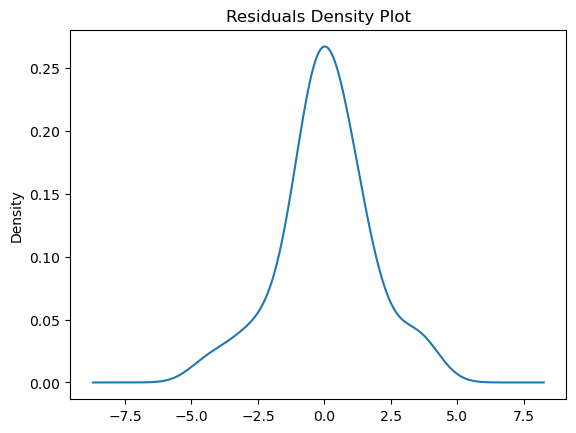

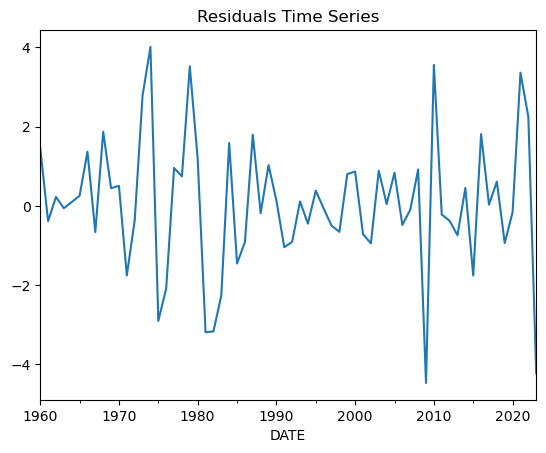

In [23]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming df is the DataFrame with an 'inflation' column
# Fit an ARIMA model to the inflation series
model = ARIMA(df.inflation, order=(1, 1, 1))
model_fit = model.fit()

# Print the summary of the fitted model
print(model_fit.summary())

# Print the residuals description
print('Residuals Description')
print(model_fit.resid.describe())

# Plot the residuals
model_fit.resid.plot(kind='kde')
plt.title('Residuals Density Plot')
plt.show()

# Plot the residuals over time
model_fit.resid.plot()
plt.title('Residuals Time Series')
plt.show()

C:\Anaconda\chowd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Anaconda\chowd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Anaconda\chowd\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              inflation   No. Observations:                   64
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -114.560
Date:                Fri, 02 Aug 2024   AIC                            251.121
Time:                        21:07:47   BIC                            274.695
Sample:                    01-01-1960   HQIC                           260.393
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5852      1.920     -0.305      0.760      -4.348       3.177
ar.L2         -1.1648      0.632     -1.842      0.065      -2.404       0.074
ar.L3         -1.0058      2.661     -0.378      0.7

C:\Anaconda\chowd\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


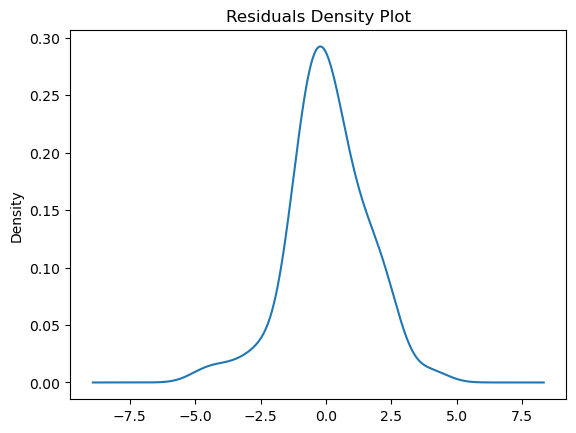

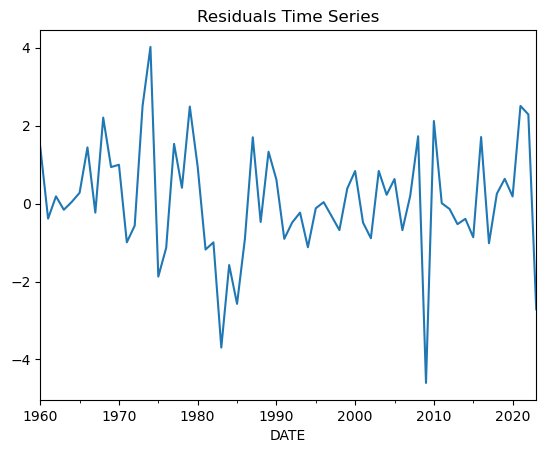

In [24]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming df is the DataFrame with an 'inflation' column
# Fit an ARIMA model to the inflation series
model = ARIMA(df.inflation, order=(5, 1, 5))
model_fit = model.fit()

# Print the summary of the fitted model
print(model_fit.summary())

# Print the residuals description
print('Residuals Description')
print(model_fit.resid.describe())

# Plot the residuals
model_fit.resid.plot(kind='kde')
plt.title('Residuals Density Plot')
plt.show()

# Plot the residuals over time
model_fit.resid.plot()
plt.title('Residuals Time Series')
plt.show()